In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import cmath
from scipy.fft import fft, fftfreq

1)  x1 = {...1,0,1,2,3,2,1,0,1...}

In [2]:
n1 = np.arange(-6,7) #variable independiente
n1
len(n1)

13

In [3]:
# x1 = señal, vamos a construir un vector usando np.array
x1 = np.array([0,0,1,0,1,2,3,2,1,0,1,0,0]) 
x1

array([0, 0, 1, 0, 1, 2, 3, 2, 1, 0, 1, 0, 0])

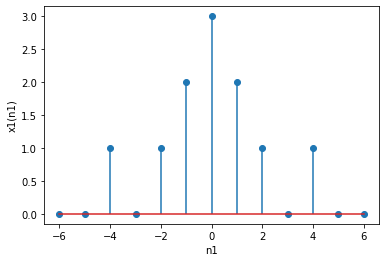

In [4]:
plt.stem(n1,x1)
plt.xlabel('n1')
plt.ylabel('x1(n1)')
plt.show()

Espectros de magnitud y fase

In [5]:
h1 = fft(x1)/len(n1) # Transformada de Fourier de x1 
len(h1)

13

In [6]:
w1 = np.linspace(0, np.pi, len(n1)) # vector de la variable independiente en el campo de la frecuencia.
len(w1)

13

* cmath.polar: calcula módulo y fase de la fn h.

In [7]:
mod1 = np.zeros(len(n1))
phi1 = np.zeros(len(n1))

In [8]:
for i in n1:
    (mod1[i],phi1[i]) = cmath.polar(h1[i])

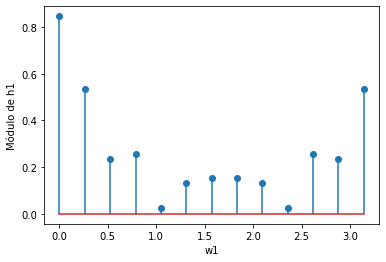

In [9]:
plt.stem(w1,mod1)
plt.ylabel('Módulo de h1')
plt.xlabel('w1')
plt.show()

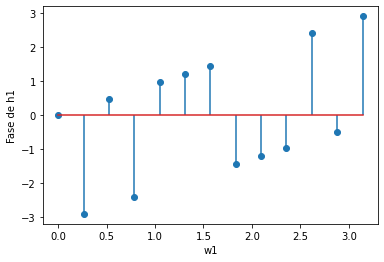

In [10]:
plt.stem(w1,phi1)
plt.ylabel('Fase de h1')
plt.xlabel('w1')
plt.show()

In [11]:
E_t = np.sum(abs(x1)**2)
E_t

21

In [12]:
E_f = np.sum(mod1**2)*len(n1)
E_f

21.0

2)

In [13]:
n2 = np.arange(0,48)

In [14]:
x2 = 2 + 2*np.cos(np.pi*n2/4) + np.cos(np.pi*n2/2) + (1/2)*np.cos(3*np.pi*n2/4)

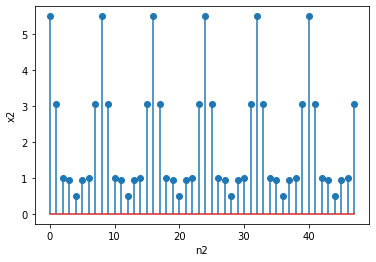

In [15]:
plt.stem(n2,x2)
plt.xlabel('n2')
plt.ylabel('x2')
plt.show()

In [16]:
# Espectro de densidad de potencia = fft

h2 = fft(x2)

In [17]:
w2 = np.linspace(0,np.pi,len(n2))

In [18]:
mod2 = abs(h2)

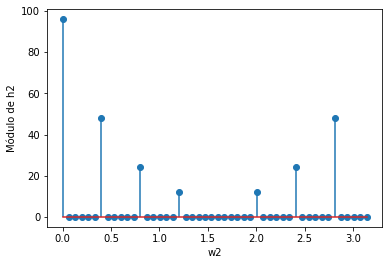

In [19]:
plt.stem(w2, mod2)
plt.xlabel('w2')
plt.ylabel('Módulo de h2')
plt.show()

In [20]:
E2_t = np.sum(abs(x2)**2)
E2_t

317.9999999999999

In [21]:
E2_f = np.sum(mod2**2)/len(n2)
E2_f

317.99999999999983

3)

In [22]:
n3 = np.arange(-10,10)

In [23]:
a = 0.5  # valor arbitrario menor a 1

In [24]:
x3 = a**(abs(n3))

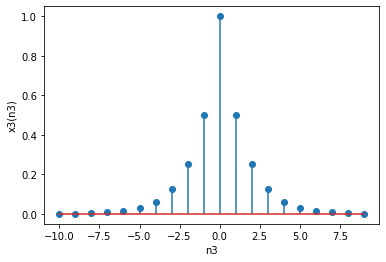

In [25]:
plt.stem(n3, x3)
plt.xlabel('n3')
plt.ylabel('x3(n3)')
plt.show()

In [26]:
h3 = fft(x3)

In [27]:
w3 = np.linspace(0, np.pi, len(n3))

In [28]:
mod3 = np.zeros(len(n3))
phi3 = np.zeros(len(n3))

In [29]:
for i in n3:
    (mod3[i],phi3[i]) = cmath.polar(h3[i])

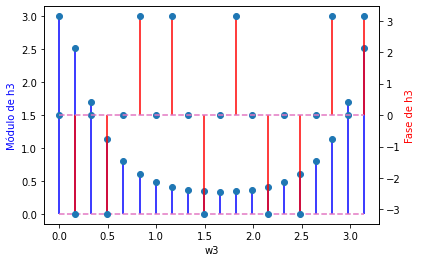

In [30]:
fig,ax = plt.subplots()

# En el primer eje y

ax.stem(w3, mod3, 'b', basefmt = 'C6--')
ax.set_ylabel('Módulo de h3', color = 'blue')
ax.set_xlabel('w3')

# En el segundo eje y

ax2 = ax.twinx()
ax2.stem(w3, phi3, 'r', basefmt = 'C6--')
ax2.set_ylabel('Fase de h3', color = 'red')
plt.show()

4)

In [31]:
C4 = 80
Fc4 = 90/60
O4 = np.array([1,2,3,4])*2*np.pi*Fc4
A4 = np.array([20.0000, 10.0240, 3.5560, 0.9800])
o4 = np.array([0, -0.5655, 1.0053, -2.1363])
Fs = 200

In [32]:
N4 = 1000 # cantidad de muestras con las que quiero trabajar 
n4 = np.arange(0,1000)

In [33]:
# Conozco la Fs (200 Hz), entonces:

t4 = n4/Fs # tiempo discreto

In [34]:
P4 = np.zeros(N4)

In [37]:
for j in n4:
    P4[j] = C4 + sum( A4 * np.cos( O4 * t4[j] - o4))

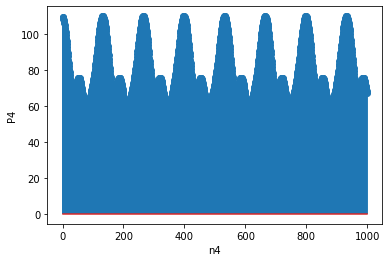

In [38]:
plt.stem(n4,P4)
plt.ylabel('P4')
plt.xlabel('n4')
plt.show()

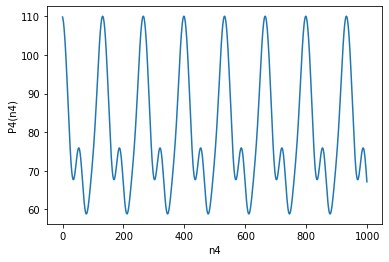

In [39]:
plt.plot(n4,P4)
plt.xlabel('n4')
plt.ylabel('P4(n4)')
plt.show()

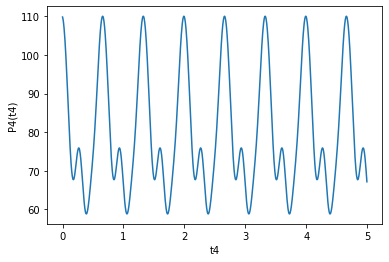

In [40]:
plt.plot(t4,P4)
plt.xlabel('t4')
plt.ylabel('P4(t4)')
plt.show()

Fc = 60 ppm  - 1 Hz

Fc = 90 ppm  - 1.5 Hz 

400 muestras - 3 ciclos completos

In [41]:
h4 = fft(P4[0:400])/len(P4[0:400]) # para que calcule la TF en tres ciclos completos (que tome 400 muestras)

In [42]:
w4 = np.linspace(0, np.pi, len(P4[0:400]))

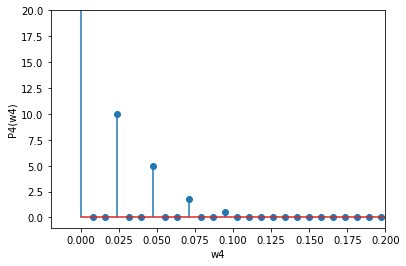

In [43]:
plt.stem(w4, abs(h4))
plt.xlabel('w4')
plt.ylabel('P4(w4)')
plt.xlim(-0.02,0.20) 
plt.ylim(-1, 20)
plt.show()

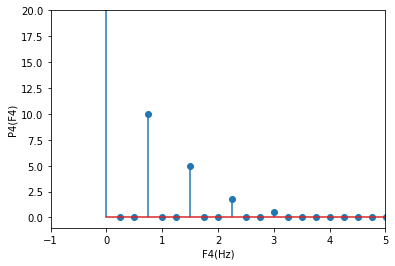

In [44]:
plt.stem((w4*Fs)/(2*np.pi), abs(h4)) #convertimos frecuencia relativa en frecuencia absoluta que depende de la Fs. 
plt.xlabel('F4(Hz)')
plt.ylabel('P4(F4)')
plt.xlim(-1,5) 
plt.ylim(-1, 20)
plt.show()

In [45]:
h_4 = fft(P4[0:300])/len(P4[0:300])

In [46]:
w_4 = np.linspace(0, np.pi, len(P4[0:300]))

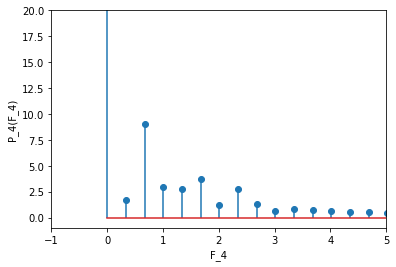

In [47]:
plt.stem((w_4*Fs)/(2*np.pi), abs(h_4))
plt.xlabel('F_4')
plt.ylabel('P_4(F_4)')
plt.xlim(-1,5) 
plt.ylim(-1,20)
plt.show()

In [48]:
ruido = 1*np.sin(2*np.pi*50*t4)

(0.0, 0.5)

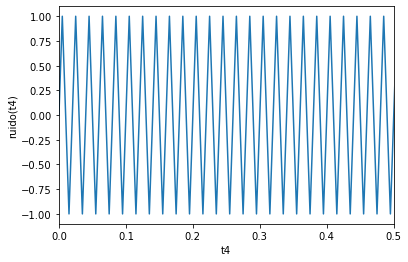

In [49]:
plt.plot(t4,ruido)
plt.xlabel('t4')
plt.ylabel('ruido(t4)')
plt.xlim(0,0.5)

In [50]:
P_4 = P4 + ruido

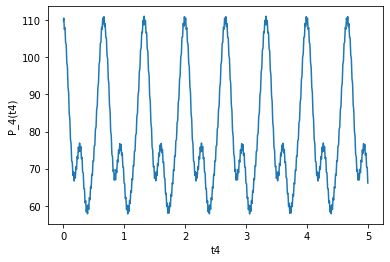

In [51]:
plt.plot(t4,P_4)
plt.xlabel('t4')
plt.ylabel('P_4(t4)')
plt.show()

In [52]:
h_4 = fft(P_4)/len(P_4)

In [53]:
w_4 = np.linspace(0, np.pi, len(P_4))

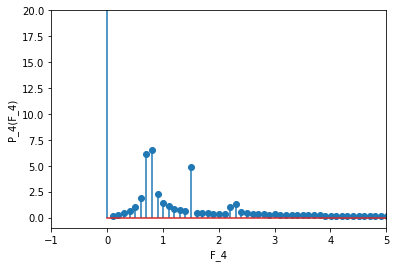

In [54]:
plt.stem((w_4*Fs)/(2*np.pi), abs(h_4))
plt.xlabel('F_4')
plt.ylabel('P_4(F_4)')
plt.xlim(-1,5) 
plt.ylim(-1,20)
plt.show()